This notebook shows you how to use Pandas from Python to explore epidemic data. We will use the daily spreadsheet from OWID containing new cases and deaths per country per day.

__I'm not an epidemiologist or a virologist and just exploring data, so I will not draw conclusions on that level nor base behavior or policy upon these explorations and _neither should you_. Even within a country the data is heavily biased, not in the least because of testing and measurement policies changing over time!__

Let's go and see if we have the current data from OWID.

In [31]:
casurl = 'https://covid.ourworldindata.org/data/'
casfil = 'owid-covid-data.csv'

url = casurl + casfil
!wget -N $url

--2021-05-17 15:10:58--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 2606:4700:3038::6815:e98a, 2606:4700:3038::6815:e989, 104.21.233.137, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|2606:4700:3038::6815:e98a|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv     [          <=>       ]  22.08M  11.6MB/s    in 1.9s    

Last-modified header missing -- time-stamps turned off.
2021-05-17 15:11:00 (11.6 MB/s) - ‘owid-covid-data.csv’ saved [23158727]



Get Pandas and NumPy for feature engineering and calculations and get our plots inline.

In [2]:
import pandas as pd
import numpy  as np

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe `df` directly from the downloaded Excel file and have a look at the first 10 lines for format.

In [3]:
df = pd.read_csv(
    'owid-covid-data.csv',
    keep_default_na = False,
    na_values       = '',
    parse_dates     = [3],
    dayfirst        = True,
)
(
    df
    .tail(10)
    .transpose()
)

89133  \
iso_code                                               ZWE   
continent                                           Africa   
location                                          Zimbabwe   
date                                   2021-05-07 00:00:00   
total_cases                                        38403.0   
new_cases                                              5.0   
new_cases_smoothed                                  20.857   
total_deaths                                        1576.0   
new_deaths                                             1.0   
new_deaths_smoothed                                  1.286   
total_cases_per_million                           2583.811   
new_cases_per_million                                0.336   
new_cases_smoothed_per_million                       1.403   
total_deaths_per_million                           106.036   
new_deaths_per_million                               0.067   
new_deaths_smoothed_per_million                      0.087   
reproduction_rate                                     0.79   
icu_patients                                           NaN   
icu_patients_per_million                               NaN   
hosp_patients                                          NaN   
hosp_patients_per_million                              NaN   
weekly_icu_admissions                                  NaN   
weekly_icu_admissions_per_million                      NaN   
weekly_hosp_admissions                                 NaN   
weekly_hosp_admissions_per_million                     NaN   
new_tests                                           1401.0   
total_tests                                       506977.0   
total_tests_per_thousand                             34.11   
new_tests_per_thousand                               0.094   
new_tests_smoothed                                  1996.0   
new_tests_smoothed_per_thousand                      0.134   
positive_rate                                         0.01   
tests_per_case                                        95.7   
tests_units                                tests performed   
total_vaccinations                                640762.0   
people_vaccinated                                 500422.0   
people_fully_vaccinated                           140340.0   
new_vaccinations                                   33407.0   
new_vaccinations_smoothed                          20060.0   
total_vaccinations_per_hundred                        4.31   
people_vaccinated_per_hundred                         3.37   
people_fully_vaccinated_per_hundred                   0.94   
new_vaccinations_smoothed_per_million               1350.0   
stringency_index                                     51.85   
population                                      14862927.0   
population_density                                  42.729   
median_age                                            19.6   
aged_65_older                                        2.822   
aged_70_older                                        1.882   
gdp_per_capita                                    1899.775   
extreme_poverty                                       21.4   
cardiovasc_death_rate                              307.846   
diabetes_prevalence                                   1.82   
female_smokers                                         1.6   
male_smokers                                          30.7   
handwashing_facilities                              36.791   
hospital_beds_per_thousand                             1.7   
life_expectancy                                      61.49   
human_development_index                              0.571   

                                                     89134  \
iso_code                                               ZWE   
continent                                           Africa   
location                                          Zimbabwe   
date                                   2021-05-08 00:00:00   
total_cases           

Use a `count` on columns to see how many missing values we have. We would like to analyze countries by `geoId`.

In [4]:
df = (
    df
    .dropna(
        subset=[
            'iso_code',
        ],
    )
)
lastdate = (
    (
        df
        ['date']
        .max()
    )
    -
    pd.Timedelta('0 days')
)
df.count()

iso_code                                 89143
continent                                84888
location                                 89143
date                                     89143
total_cases                              86256
new_cases                                86254
new_cases_smoothed                       85253
total_deaths                             76472
new_deaths                               76630
new_deaths_smoothed                      85253
total_cases_per_million                  85791
new_cases_per_million                    85789
new_cases_smoothed_per_million           84793
total_deaths_per_million                 76020
new_deaths_per_million                   76178
new_deaths_smoothed_per_million          84793
reproduction_rate                        71876
icu_patients                              9021
icu_patients_per_million                  9021
hosp_patients                            11234
hosp_patients_per_million                11234
weekly_icu_ad

Select rows with missing `iso_code`.

In [5]:
(
    df
    [
        df
        ['iso_code']
        .isna()
    ]
)

Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, new_vaccinations_smoothed_per_million, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index]
Index: []

[0 rows x 59 columns]

Because we seemed to miss some `geoId` entries, we would drop those lines using `dropna`. They were cases from Namibia, where the country code is __NA__, which we now read as data. The resulting dataframe is pivoted so we get one row per date in `dateRep`, columns by `geoId` and the number of new `cases` and `deaths` for that date and country in the cells. Again, show the first 10 rows from our new dataframe `df_geo` to check the result of our `pivot`.

In [6]:
df_geo = (
    df
    .pivot(
        index='date',
        columns='iso_code',
        values=[
            'new_cases',
            'new_deaths',
        ],
    )
)
(
    df_geo
    .head(10)
)

new_cases                                      ... new_deaths      \
iso_code         ABW AFG AGO AIA ALB AND ARE ARG ARM ATG  ...        VCT VEN   
date                                                      ...                  
2020-01-01       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...        NaN NaN   
2020-01-02       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...        NaN NaN   
2020-01-03       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...        NaN NaN   
2020-01-04       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...        NaN NaN   
2020-01-05       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...        NaN NaN   
2020-01-06       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...        NaN NaN   
2020-01-07       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...        NaN NaN   
2020-01-08       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...        NaN NaN   
2020-01-09       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...        NaN NaN   
2020-01-10       NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...        NaN NaN   

                                            
iso_code   VNM VUT WLF WSM YEM ZAF ZMB ZWE  
date                                        
2020-01-01 NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-05 NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-06 NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-07 NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-08 NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-09 NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-10 NaN NaN NaN NaN NaN NaN NaN NaN  

[10 rows x 452 columns]

Structure is looking good, lots of missing values, meaning there's no data for that country on the current date. We can describe the columns to get an idea of what's there.

In [7]:
(
    df_geo
    .describe()
    .transpose()
)

count        mean         std  min    25%    50%     75%  \
           iso_code                                                             
new_cases  ABW         0.0         NaN         NaN  NaN    NaN    NaN     NaN   
           AFG       448.0  141.705357  184.923475  0.0  26.75   72.0  186.25   
           AGO       423.0   72.427896   77.463270  0.0   8.50   51.0  102.50   
           AIA         0.0         NaN         NaN  NaN    NaN    NaN     NaN   
           ALB       434.0  304.182028  322.148778  0.0  50.00  149.5  538.00   
...                    ...         ...         ...  ...    ...    ...     ...   
new_deaths WSM         0.0         NaN         NaN  NaN    NaN    NaN     NaN   
           YEM       382.0    3.374346    5.740099  0.0   0.00    1.0    4.00   
           ZAF       416.0  132.716346  149.137331  0.0  43.00   84.5  163.25   
           ZMB       410.0    3.073171    5.945516  0.0   0.00    1.0    3.00   
           ZWE       420.0    3.766667    8.825426  0.0   0.00    1.0    3.00   

                        max  
           iso_code          
new_cases  ABW          NaN  
           AFG       1485.0  
           AGO        392.0  
           AIA          NaN  
           ALB       1239.0  
...                     ...  
new_deaths WSM          NaN  
           YEM         52.0  
           ZAF        844.0  
           ZMB         67.0  
           ZWE         70.0  

[452 rows x 8 columns]

Get to know your data by visualization, in this case the number of new `cases` per day for my home country __NL__.

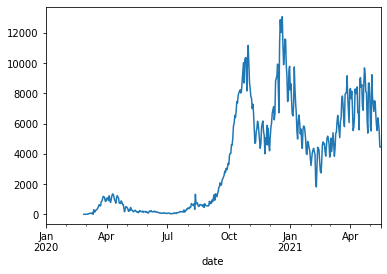

In [8]:
(
    df_geo
    ['new_cases']
    ['NLD']
    .plot()
)

Note that you could also use `df_geo.cases.NL.plot()` here, but I prefer the more explicit notation, especially in more complex statements.

Because of the pivoted data format it is just as easy to look at the number of `deaths`.

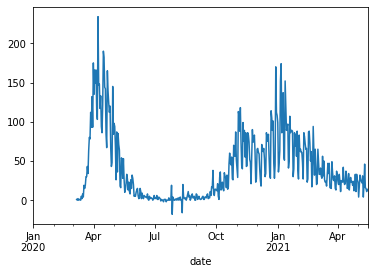

In [9]:
(
    df_geo
    ['new_deaths']
    ['NLD']
    .plot()
)

If you want both, you have to generate different slices of our pivot table (or make a new pivot), so the call is a bit different.

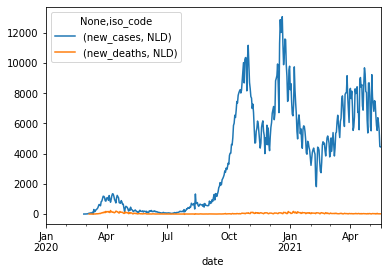

In [10]:
(
    df_geo
    [
        [
            ('new_cases', 'NLD'),
            ('new_deaths', 'NLD'),
        ]
    ]
    .plot()
)

What would China look like?

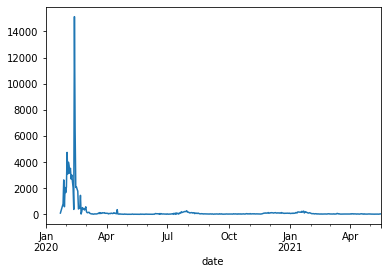

In [11]:
(
    df_geo
    ['new_cases']
    ['CHN']
    .plot()
)

The big spike in the middle was a change in counting, where they decided to count an extra 15000 cases. When was that? We select lines for `cases` in __CN__ above 2500 and show the actual number.

In [12]:
(
    df_geo
    [
        df_geo
        ['new_cases']
        ['CHN'] 
        > 2500
    ]
    ['new_cases']
    ['CHN']
)

date
2020-01-28     2632.0
2020-02-02     4739.0
2020-02-03     3086.0
2020-02-04     3991.0
2020-02-05     3733.0
2020-02-06     3147.0
2020-02-07     3523.0
2020-02-08     2704.0
2020-02-09     3015.0
2020-02-10     2525.0
2020-02-13    15136.0
2020-02-14     6463.0
Name: CHN, dtype: float64

So what does the original record look like? We select the full record for `geoId` __CN__ and the correct date.

In [13]:
(
    df
    [
        (
            df
            ['iso_code']
            == 'CHN'
        )
        &
        (
            df
            ['date']
            == '20200213'
        )
    ]
    ['new_cases']
)

16792    15136.0
Name: new_cases, dtype: float64

After these selection examples we'll try some more advanced exploration. To see the growth in number of cases, we use a cumulative sum with `cumsum`, in this case we show __CN__ and __NL__.

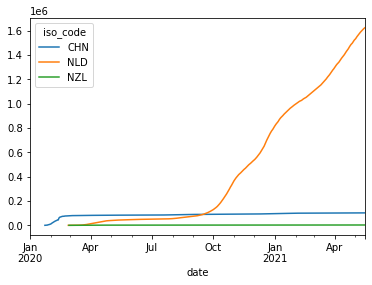

In [14]:
(
    df_geo
    ['new_cases']
    [
        [
            'CHN',
            'NLD',
            'NZL',
        ]
    ]
    .cumsum()
    .plot()
)

Because of the large difference in numbers, it may help to use a logarithmic scale. We can change the data passed to the plot using the `log10` function from NumPy. This will generate some warnings because `cases` can be zero.

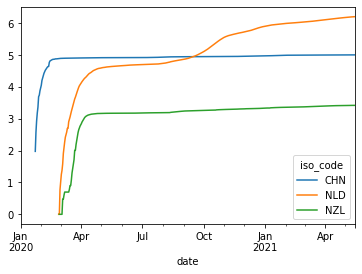

In [15]:
(
    np.log10(
        df_geo
        ['new_cases']
        [
            [
                'CHN',
                'NLD',
                'NZL',
            ]
        ]
        .cumsum()
    )
    .plot()
)

Alternatively, we ask `plot` to use a logarithmic scale.

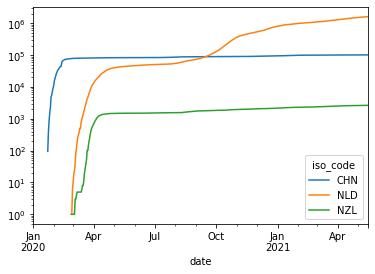

In [16]:
(
    df_geo
    ['new_cases']
    [
        [
            'CHN',
            'NLD',
            'NZL',
        ]
    ]
    .cumsum()
    .plot(
        logy=True,
    )
)

This clearly shows the phases in __CN__, first some external infections, then an incubation period, then the internal infections take off. Measures like isolation and social distancing seem to work, the curve flattens and stabilizes. For __NL__ we see measures take effect. Also, no real startup curve here.

Perhaps some other countries also show this effect, have a look at your own country!

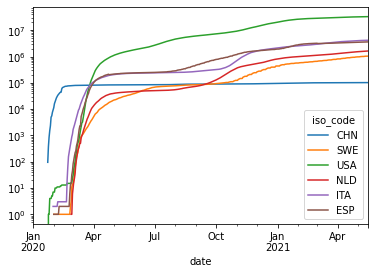

In [17]:
(
    df_geo
    ['new_cases']
    [
        [
            'CHN',
            'SWE',
            'USA',
            'NLD',
            'ITA',
            'ESP',
        ]
    ]
    .cumsum()
    .plot(
        logy=True,
    )
)

Another often used measure is relative growth in total number of cases per day. Therefore we need to divide the current day by the previous one, easily implemented by dividing the dataframe by the same dataframe shifted one row. Note that we are now only showing data from March 16 onwards, as specified by the `loc` method which allows us to select from the dataframe index.

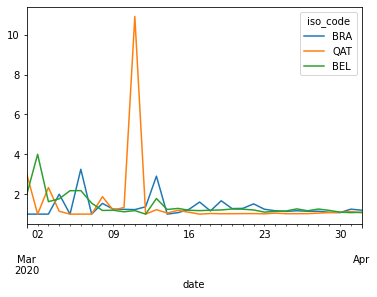

In [18]:
(
    (
        (
            df_geo
            .cumsum()
        )
        /
        (
            df_geo
            .shift(1)
            .cumsum()
        )
    )
    ['new_cases']
    [  
        [
            'BRA',
            'QAT',
            'BEL',
        ]
    ]
    .loc['20200301':'20200401']
    .plot()
)

From this factor (relative increase in cases since yesterday) we can calculate the number of days to double the total amount of cases by some logarithmic magic. For __NL__ the number doubled every one or two days in the beginning but now it doubles in way over 14 days, which is a good sign (more about these 14 days later on). If this number keeps rising we will never get to the point where it doubles again.

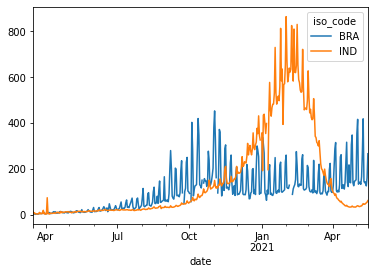

In [19]:
(
    (
        np.log10(2)
        /
        np.log10(
            (
                df_geo
                .cumsum()
            )
            /
            (
                df_geo
                .shift(1)
                .cumsum()
            )
        )
    )
    ['new_cases']
    [
        [
            'BRA',
            'IND',
        ]
    ]
    .loc['20200316':]
    .plot()
)

Rolling window functions can be used to smooth a curve, in this case the `rolling` 7 day `mean` new cases for __BE__ and __NL__.

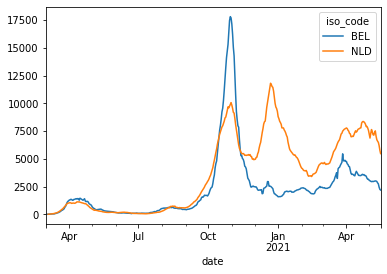

In [20]:
(
    df_geo
    ['new_cases']
    [
        [
            'BEL',
            'NLD',
        ]
    ]
    .rolling(7)
    .mean()
    .loc['20200301':]
    .plot()
)

The default window function is a rectangle (called `boxcar`), where all values are weighed equally. Using another window function will weigh the values in the window differently, such as a triangle function which will focus more on the recent values in the window.

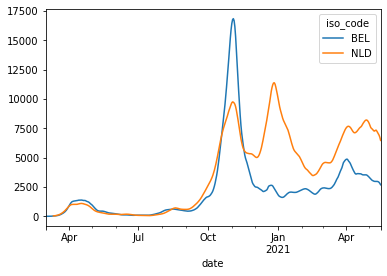

In [21]:
(
    df_geo
    ['new_cases']
    [
        [
            'BEL',
            'NLD',
        ]
    ]
    .rolling(
        14,
        win_type='triang',
    )
    .mean()
    .loc['20200301':]
    .plot()
)

If we use such a window on the __CN__ data you can see that the spike for 15000 cases gets more evenly distributed.

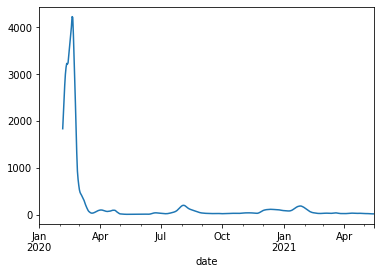

In [22]:
(
    df_geo
    ['new_cases']
    ['CHN']
    .rolling(
        14,
        win_type='triang',
    )
    .mean()
    .plot()
)

Now let's have a look at _the curve_ which we are supposed to flatten, to prevent overload on our healthcare system. It shows the number of active cases (the _infected_ category in the SIR model). We assume that an infection lasts 14 days on average (which is under discussion, currently the last 14 days is used by EU CDC but other studies suggest 18 days), so we only look at new cases from the last 14 days. By leaving out older infections (the _removed_ category in SIR) this shows us the current number of active infections.

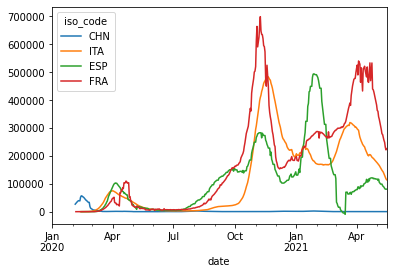

In [23]:
(
    df_geo
    ['new_cases']
    [
        [
            'CHN',
            'ITA',
            'ESP',
            'FRA',
        ]
    ]
    .rolling(14)
    .sum()
    .plot()
)

Assuming that we see about 2% of currently infected in Intensive Care, we can monitor the necessary capacity with the following graph.

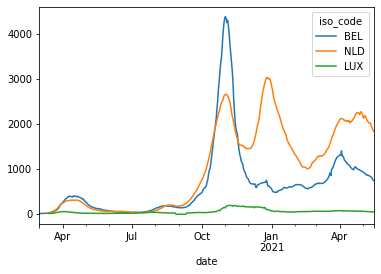

In [24]:
(
    (
        df_geo
        ['new_cases']
        [
            [
                'BEL',
                'NLD',
                'LUX',
            ]
        ]
        .rolling(14)
        .sum()
        .loc['20200301':] 
        * 0.02
    )
    .plot()    
)

For __NL__ this more or less corresponds with the official ICU data. The actual drop in patients is probably offset by an increase in testing, so we may have to gradually lower the percentage.

In [25]:
(
    (
        df_geo
        ['new_cases']
        [
            [
                'BEL',
                'NLD',
            ]
        ]
        .rolling(14)
        .sum()
        * 0.01
    )
    .tail(14)
)

iso_code       BEL      NLD
date                       
2021-05-03  452.70  1078.93
2021-05-04  445.71  1087.67
2021-05-05  435.77  1074.78
2021-05-06  427.38  1045.99
2021-05-07  428.80  1028.24
2021-05-08  423.10  1021.56
2021-05-09  421.91  1006.63
2021-05-10  417.88  1003.05
2021-05-11  412.98  1004.74
2021-05-12  406.24   981.83
2021-05-13  398.51   955.34
2021-05-14  378.75   932.61
2021-05-15  366.37   919.49
2021-05-16  363.61   908.87

The structure of our dataframe lends itself to exploring all kinds of other measures. What about infection rate? The example below gives the average number of cases for last week divided by the infectious cases a week before, a proxy for the infamous `R` measure. Again we use rolling window for smoothing and add a couple of example options for `plot`.

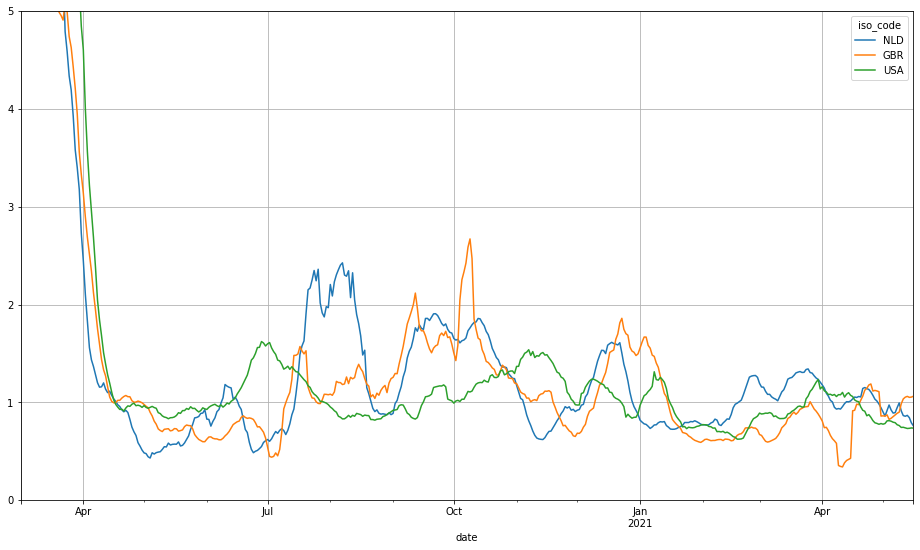

In [26]:
countries = [
    'NLD',
    'GBR',
    'USA',
]

(
    (
        (
            df_geo
            .rolling(7)
            .mean()
        )
        /
        (
            df_geo
            .shift(7)
            .rolling(14)
            .mean()
        )
    )
    ['new_cases']
    [countries]
    .loc['20200301':]
    .plot(
        figsize=(16, 9),
        grid=True,
        ylim=(0, 5),
    )
)

Or what about the number of deaths in the week before as part of the number of active cases in the week before that? In other words, an estimate of the death rate *for known cases*, heavily depending on the testing and recording policies so in no way comparable across countries or even within a country over time.

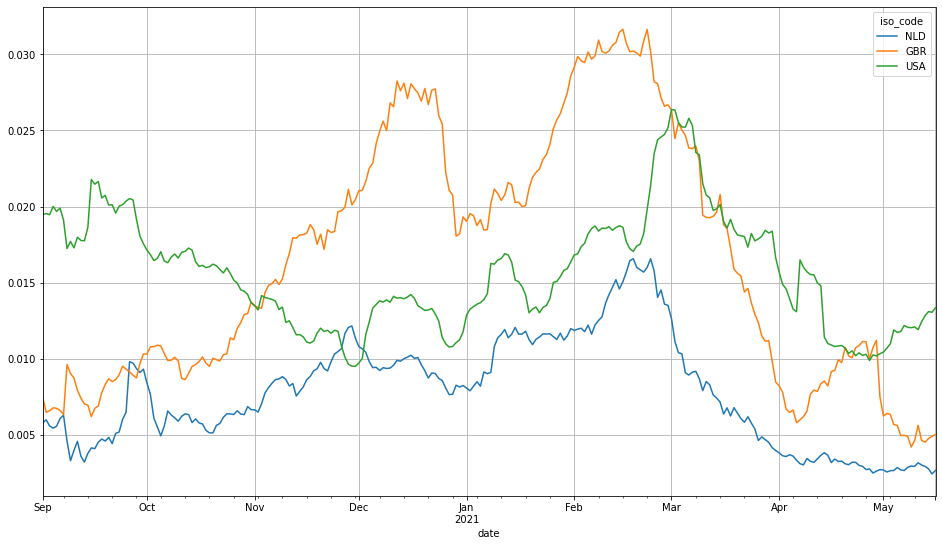

In [27]:
(
    (
        (
            df_geo
            ['new_deaths']
            .rolling(7)
            .mean()
        )
        /
        (
            df_geo
            ['new_cases']
            .shift(7)
            .rolling(14)
            .mean()
        )
    )
    [countries]
    .loc['20200901':]
    .plot(
        figsize=(16, 9),
        grid=True,
    )
)

Instead of plotting you can also use aggregate functions at the end, such as `mean`. Again, a lot of information about the underlying assumptions and policies would be needed to interpret these numbers correctly. The numbers below are actually more a measure of test intensity, e.g. if you only test people with heavy symptoms the fatality rate will be high.

In [28]:
(
    (
        (
            df_geo
            ['new_deaths']
            .rolling(7)
            .mean()
        )
        /
        (
            df_geo
            ['new_cases']
            .shift(7)
            .rolling(14)
            .mean()
        )
    )
    [countries]
    .loc['20200901':]
    .mean()
)

iso_code
NLD    0.007828
GBR    0.016541
USA    0.015669
dtype: float64

Based on a recent paper by Daddi and Giavalisco, the double log of the cumulative cases divided by the daily increase should approach linearity. Ignoring the noise of spurious cases in the beginning, at least the middle part of the outbreak looks promising.

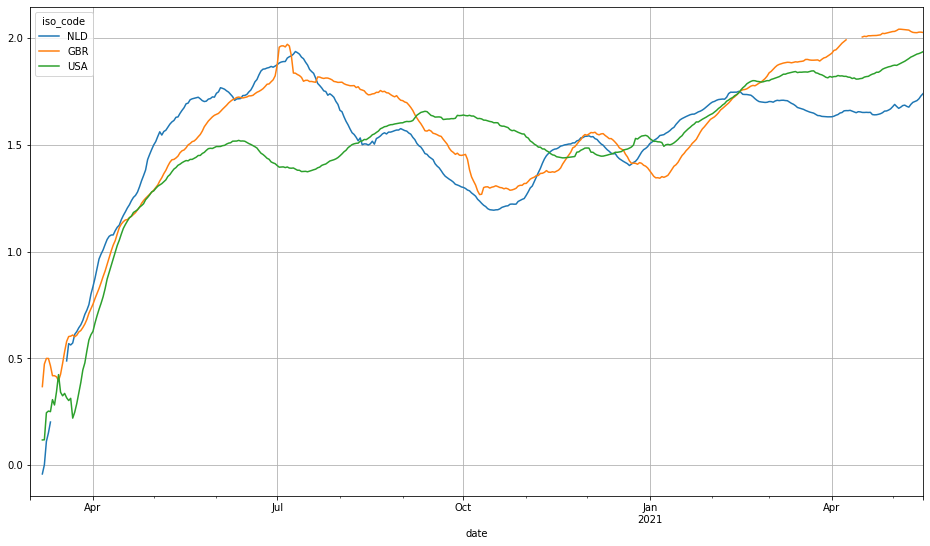

In [29]:
(
    np.log(
        np.log(
            (
                df_geo
                .cumsum()
            )
            / df_geo
        )
    )
    ['new_cases']
    [countries]
    .loc['20200301':]
    .rolling(7)
    .mean()
    .plot(
        figsize=(16, 9),
        grid=True,
    )
)

Assuming an outbreak follows the Gumbel distribution, the log of daily new cases divided by the total should show a line for each period.

https://en.wikipedia.org/wiki/Gumbel_distribution

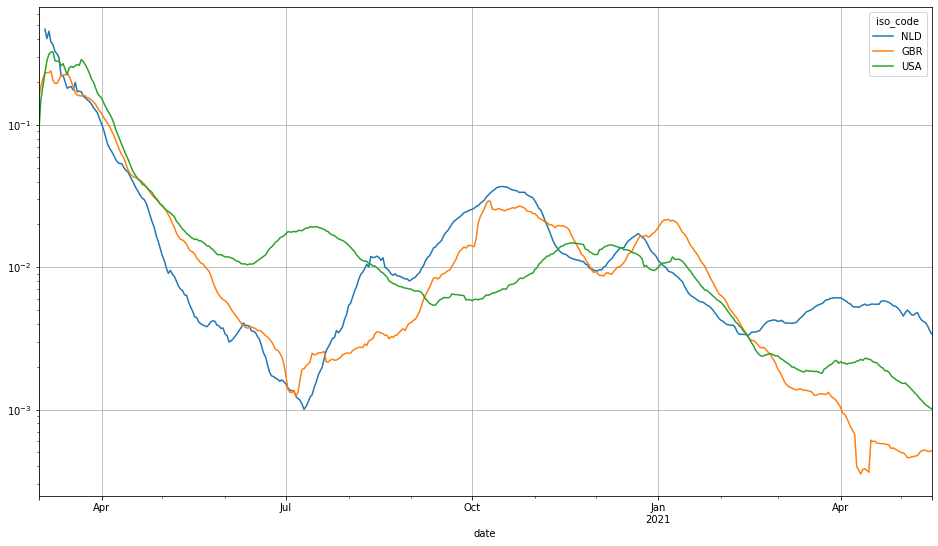

In [30]:
(
    (
        df_geo 
        /
        (
            df_geo
            .cumsum()
        )
    )
    ['new_cases']
    [countries]
    .rolling(7)
    .mean()
    .loc['20200301':]
    .plot(
        figsize=(16, 9),
        grid=True,
        logy=True,
    )
)

Keep exploring! Stay home, wash your hands, keep your distance.